# **ANN DENGAN FEEDBACK**

### **IMPORT LIBRARY**

In [5]:
import sys
print(sys.executable)
print(sys.version)

c:\Users\Hanna\AppData\Local\Programs\Python\Python313\python.exe
3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

AttributeError: partially initialized module 'pandas' from 'c:\Users\Hanna\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\__init__.py' has no attribute 'core' (most likely due to a circular import)

### **DATASET**

**Model matematis *plant***:

$$
y(k)= \frac{1}{[1+y(k-1)]^2} + 0,25x(k) - 0,3x(k-1)
$$
</br></nr>
**Info database**:</br>
x(t) = generate random -1 s.d. 1</br>
y(t) = model plant
</br></br>
**Dimensi data**:</br>
30000 $\times$ 2

**Buat dataset**

In [ ]:
def plant_data(N):
    # buat nilai x
    np.random.seed(42)
    x_val = np.random.uniform(-1, 1, N)

    # buat nilai y
    y_val = np.zeros(N)
    y_val[0] = 0.0

    for k in range(1, N):
        y_val[k] = 1/(1 + y_val[k-1]**2) + 0.25*x_val[k] - 0.3*x_val[k-1]

    dataset = pd.DataFrame({'x': x_val, 'y': y_val})
    return dataset

# Jumlah data
N = 30004

dk = plant_data(N)
dk

,x,y
0,-0.250920,0.000000
1,0.901429,1.300633
2,0.463988,0.217088
3,0.197317,0.865127
4,-0.687963,0.340751
...,...,...
29999,-0.485204,0.424156
30000,0.276289,1.062157
30001,-0.081415,0.366645
30002,0.928997,1.138175


In [ ]:
df_value1 = pd.DataFrame({
    'Min_value': dk.min(),
    'Max_value': dk.max()
})

df_value1

,Min_value,Max_value
x,-0.999977,0.999850
y,-0.230966,1.543344


**Normalisasi Data**

Normalisasi data input dan output ke [-1,1]

In [ ]:
# Normalisasi Min-Max [-1, 1]
def min_max_scaling(df):
    df_scaled = df.copy()
    for column in df_scaled.columns:
        min_val = df_scaled[column].min()
        max_val = df_scaled[column].max()
        df_scaled[column] = (2 * (df_scaled[column] - min_val) / (max_val - min_val)) - 1
    return df_scaled

# Denormalisasi
def min_max_denormalize(scaled_df, min_val, max_val):
    return (scaled_df + 1) / 2 * (max_val - min_val) + min_val


dk_scaled = min_max_scaling(dk)
dk_scaled

,x,y
0,-0.250878,-0.739655
1,0.901570,0.726417
2,0.464092,-0.494954
3,0.197398,0.235514
4,-0.687959,-0.355561
...,...,...
29999,-0.485183,-0.261547
30000,0.276377,0.457607
30001,-0.081359,-0.326373
30002,0.929141,0.543294


In [ ]:
df_value2 = pd.DataFrame({
    'Min_value': dk_scaled.min(),
    'Max_value': dk_scaled.max()
})

df_value2

,Min_value,Max_value
x,-1.0,1.0
y,-1.0,1.0


**Model Data**

In [ ]:
def lagged_dataset(df, cols, lag):
    df_new = pd.DataFrame()
    for col in cols:
        for i in range(lag+1):
            if i == 0:
                new_col_name = f'{col}(t)'
            else:
                new_col_name = f'{col}(t-{i})'

            # geser nilai kolom ke bawah sebanyak i
            df_new[new_col_name] = df[col].shift(i)
    
    # drop baris dengan nilai NaN
    df_new = df_new.dropna().reset_index(drop=True)

    return df_new

df_lag = lagged_dataset(dk_scaled, cols=['x', 'y'], lag=4)
df_lag

,x(t),x(t-1),x(t-2),x(t-3),x(t-4),y(t),y(t-1),y(t-2),y(t-3),y(t-4)
0,-0.687959,0.197398,0.464092,0.901570,-0.250878,-0.355561,0.235514,-0.494954,0.726417,-0.739655
1,-0.688007,-0.687959,0.197398,0.464092,0.901570,0.309039,-0.355561,0.235514,-0.494954,0.726417
2,-0.883846,-0.688007,-0.687959,0.197398,0.464092,-0.151846,0.309039,-0.355561,0.235514,-0.494954
3,0.732479,-0.883846,-0.688007,-0.687959,0.197398,0.651803,-0.151846,0.309039,-0.355561,0.235514
4,0.202311,0.732479,-0.883846,-0.688007,-0.687959,-0.483698,0.651803,-0.151846,0.309039,-0.355561
...,...,...,...,...,...,...,...,...,...,...
29995,-0.485183,-0.197944,-0.961108,0.495755,0.904693,-0.261547,0.419420,-0.157532,-0.375300,0.455669
29996,0.276377,-0.485183,-0.197944,-0.961108,0.495755,0.457607,-0.261547,0.419420,-0.157532,-0.375300
29997,-0.081359,0.276377,-0.485183,-0.197944,-0.961108,-0.326373,0.457607,-0.261547,0.419420,-0.157532
29998,0.929141,-0.081359,0.276377,-0.485183,-0.197944,0.543294,-0.326373,0.457607,-0.261547,0.419420


### **EDA** (Exploratory Data Analysis)

**Struktur data**

In [ ]:
print("Info Dataset")
print("Ukuran dataset lag:", df_lag.shape, "\n")
df_lag.info()

Info Dataset
Ukuran dataset lag: (30000, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x(t)    30000 non-null  float64
 1   x(t-1)  30000 non-null  float64
 2   x(t-2)  30000 non-null  float64
 3   x(t-3)  30000 non-null  float64
 4   x(t-4)  30000 non-null  float64
 5   y(t)    30000 non-null  float64
 6   y(t-1)  30000 non-null  float64
 7   y(t-2)  30000 non-null  float64
 8   y(t-3)  30000 non-null  float64
 9   y(t-4)  30000 non-null  float64
dtypes: float64(10)
memory usage: 2.3 MB


**Deskripsi data**

In [ ]:
df_lag.describe().T

,count,mean,std,min,25%,50%,75%,max
x(t),30000.0,-0.000802,0.575900,-1.0,-0.497520,0.000553,0.495643,1.0
x(t-1),30000.0,-0.000776,0.575892,-1.0,-0.497475,0.000607,0.495643,1.0
x(t-2),30000.0,-0.000792,0.575873,-1.0,-0.497475,0.000607,0.495608,1.0
x(t-3),30000.0,-0.000759,0.575897,-1.0,-0.497475,0.000647,0.495643,1.0
x(t-4),30000.0,-0.000777,0.575896,-1.0,-0.497475,0.000607,0.495643,1.0
y(t),30000.0,0.032763,0.376475,-1.0,-0.243049,0.035925,0.310335,1.0
y(t-1),30000.0,0.032795,0.376451,-1.0,-0.243038,0.035940,0.310335,1.0
y(t-2),30000.0,0.032760,0.376452,-1.0,-0.243049,0.035925,0.310288,1.0
y(t-3),30000.0,0.032796,0.376468,-1.0,-0.243038,0.035940,0.310335,1.0
y(t-4),30000.0,0.032756,0.376486,-1.0,-0.243049,0.035925,0.310288,1.0


**Cek missing values**

In [ ]:
df_lag.isna().sum()

x(t)      0
x(t-1)    0
x(t-2)    0
x(t-3)    0
x(t-4)    0
y(t)      0
y(t-1)    0
y(t-2)    0
y(t-3)    0
y(t-4)    0
dtype: int64

**Cek duplikasi**

In [ ]:
df_lag.duplicated().sum()

np.int64(0)

### **PRE-PROCESSING DATA**

**Split Data Input dan Target**

In [ ]:
X = df_lag[['x(t)', 'x(t-1)', 'x(t-2)', 'x(t-3)', 'x(t-4)', 'y(t-1)', 'y(t-2)', 'y(t-3)', 'y(t-4)']].values
Y = df_lag[['y(t)']].values

print("Input set shape :", X.shape)
print("Target set shape:", Y.shape)

Input set shape : (30000, 9)
Target set shape: (30000, 1)


**Split Model Dataset**

X = [X(t), X(t-1), X(t-2), X(t-3), X(t-4), Y(t-1), Y(t-2), Y(t-3), Y(t-4)]</br>
Y = [Y(t)]</br>

**Training** : 15000 dataset</br>
**Validasi** : 10000 (5000 data training akhir + 5000 dataset)</br>
**Testing**  : 10000 dataset


In [ ]:
def split_dataset(X, Y):
    assert len(X) == len(Y), "Panjang X dan Y harus sama"
    assert len(X) == 30000, "Dataset harus 30.000 sample sesuai aturan"

    X_train = X[:15000]
    Y_train = Y[:15000]

    X_val = np.concatenate([X_train[-5000:], X[15000:20000]])
    Y_val = np.concatenate([Y_train[-5000:], Y[15000:20000]])

    X_test = X[20000:]
    Y_test = Y[20000:]

    return X_train, Y_train, X_val, Y_val, X_test, Y_test

X_train, Y_train, X_val, Y_val, X_test, Y_test = split_dataset(X, Y)

print("Training shape  :", X_train.shape, Y_train.shape)
print("Validation shape:", X_val.shape, Y_val.shape)
print("Test shape      :", X_test.shape, Y_test.shape)

Training shape  : (15000, 9) (15000, 1)
Validation shape: (10000, 9) (10000, 1)
Test shape      : (10000, 9) (10000, 1)


# STAGE 1: DEEP LEARNING

### **Neural Network Model** </br>
(belum ada NARX - masih error)

### **Training dan Validation Data**

In [ ]:
class NN:
    def __init__(self, input_size, hidden_size, output_size, lr=0.001, seed=42):

        # Parameters
        self.NI = input_size
        self.NH = hidden_size
        self.NO = output_size
        self.lr = lr

        # Weights
        np.random.seed(seed)
        self.v = np.random.rand(self.NI, self.NH)   # input x hidden
        self.vb = np.random.rand(self.NH)           # 1 x hidden
        self.w = np.random.rand(self.NH, self.NO)   # hidden x output
        self.wb = np.random.rand(self.NO)           # 1 x output

    # --- Set Weights ---
    def set_weights(self, weights):
        """Load weights from dict into the model"""
        self.v = weights["v"].copy()
        self.vb = weights["vb"].copy()
        self.w = weights["w"].copy()
        self.wb = weights["wb"].copy()

    # --- Get Weights ---
    def get_weights(self):
        """Return current weights as a dict"""
        return {
            "v": self.v.copy(),
            "vb": self.vb.copy(),
            "w": self.w.copy(),
            "wb": self.wb.copy()
        }
    
    # --- Activation functions ---
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def d_sigmoid(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def tanh(self, x):
        return np.tanh(x)

    def d_tanh(self, x):
        return 1 - np.tanh(x) ** 2
    
    def reLu(self, x):
        return np.maximum(0, x)

    def d_reLu(self, x):
        return np.where(x > 0, 1, 0)

    # --- Feedforward ---
    def feedforward(self, x):
        # hidden units
        self.z_in = np.dot(x, self.v) + self.vb
        self.z = self.tanh(self.z_in)                # change activation function here

        # output units
        self.y_in = np.dot(self.z, self.w) + self.wb
        #self.y = self.sigmoid(self.y_in)                # change activation function here! self.y is object in this class
        self.y = self.y_in                                                   

        return self.y

    # --- Backpropagation ---
    def backpropagation(self, x, t):
        # error output
        # delta_y = (t - self.y)*self.sigmoid_derivative(self.y_in)  # change activation function here
        delta_y = (t - self.y)                                   
        del_w = self.lr * np.outer(self.z, delta_y)
        del_wb = self.lr * delta_y

        # error hidden
        delta_zin = np.dot(delta_y, self.w.T)
        delta_z = delta_zin * self.d_tanh(self.z_in)  # change activation function here
        del_v = self.lr * np.outer(x, delta_z)
        del_vb = self.lr * delta_z

        # update bobot
        self.w += del_w
        self.wb += del_wb
        self.v += del_v
        self.vb += del_vb

        return np.mean(delta_y**2)   # return MSE

    # --- Training loop with validation for BPNN---
    def fit_bpnn(self, X_train, T_train, X_val=None, T_val=None,
            epochs=1000, tol=0.001, patience=20):
        history = {"train_loss": [], "val_loss": []}
        best_val_loss = float("inf")
        best_weights = None
        patience_ctr = 0             

        for epoch in range(epochs):
            mse = 0
            # training
            for i in range(len(X_train)):
                x = X_train[i]
                t = T_train[i]
                self.feedforward(x)
                mse += self.backpropagation(x, t)
            mse /= len(X_train)
            history["train_loss"].append(mse)       # mse for every epoch

            # validation
            if X_val is not None and T_val is not None:
                val_loss = 0
                for i in range(len(X_val)):
                    x = X_val[i]
                    t = T_val[i]
                    y = self.feedforward(x)
                    val_loss += np.mean((t - y)**2)
                val_loss /= len(X_val)
                history["val_loss"].append(val_loss)

                # early stopping check
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_weights = (self.v.copy(), self.vb.copy(), self.w.copy(), self.wb.copy())
                    patience_ctr = 0  # reset patience counter
                else:
                    patience_ctr += 1
                
                # stop training if no improvement for 'patience' epochs
                if patience_ctr >= patience:
                    print(f"Early stopping at epoch {epoch+1}, val_loss={val_loss:.6f}, train_loss={mse:.6f}")
                    if best_weights is not None:
                        self.v, self.vb, self.w, self.wb = best_weights
                    break

            # tolerance check (on training loss)
            if mse < tol:
                print(f"Training stopped at epoch {epoch+1}, train_loss={mse:.6f}")
                if best_weights is not None:
                    self.v, self.vb, self.w, self.wb = best_weights
                break

            if (epoch+1) % 100 == 0 or epoch == 0:
                if val_loss is not None:
                    print(f"Epoch {epoch+1}: train_loss={mse:.6f}, val_loss={val_loss:.6f}")
                else:
                    print(f"Epoch {epoch+1}: train_loss={mse:.6f}")

        return history
    
    # --- Prediction ---
    def predict(self, X_test):
        outputs = []
        for x in X_test:
            outputs.append(self.feedforward(x))
        return np.array(outputs)

In [ ]:
model = NN(input_size=X_train.shape[1], hidden_size=64, output_size=1, lr=0.001)

# training
history = model.fit_bpnn(X_train, Y_train, X_val, Y_val, epochs=1000, tol=1e-4, patience=20)

print("Last train loss:", history["train_loss"][-1])
print("Last val loss  :", history["val_loss"][-1])

# saving weights from previous training
weights = model.get_weights()

Epoch 1: train_loss=0.422106, val_loss=0.014066
Epoch 100: train_loss=0.000405, val_loss=0.000394
Epoch 200: train_loss=0.000248, val_loss=0.000237
Epoch 300: train_loss=0.000186, val_loss=0.000180
Epoch 400: train_loss=0.000153, val_loss=0.000149
Epoch 500: train_loss=0.000134, val_loss=0.000130
Epoch 600: train_loss=0.000120, val_loss=0.000117
Epoch 700: train_loss=0.000109, val_loss=0.000106
Epoch 800: train_loss=0.000100, val_loss=0.000098
Training stopped at epoch 802, train_loss=0.000100
Last train loss: 9.998944218139017e-05
Last val loss  : 9.737427287967515e-05


**Plot Loss Training vs Validation**

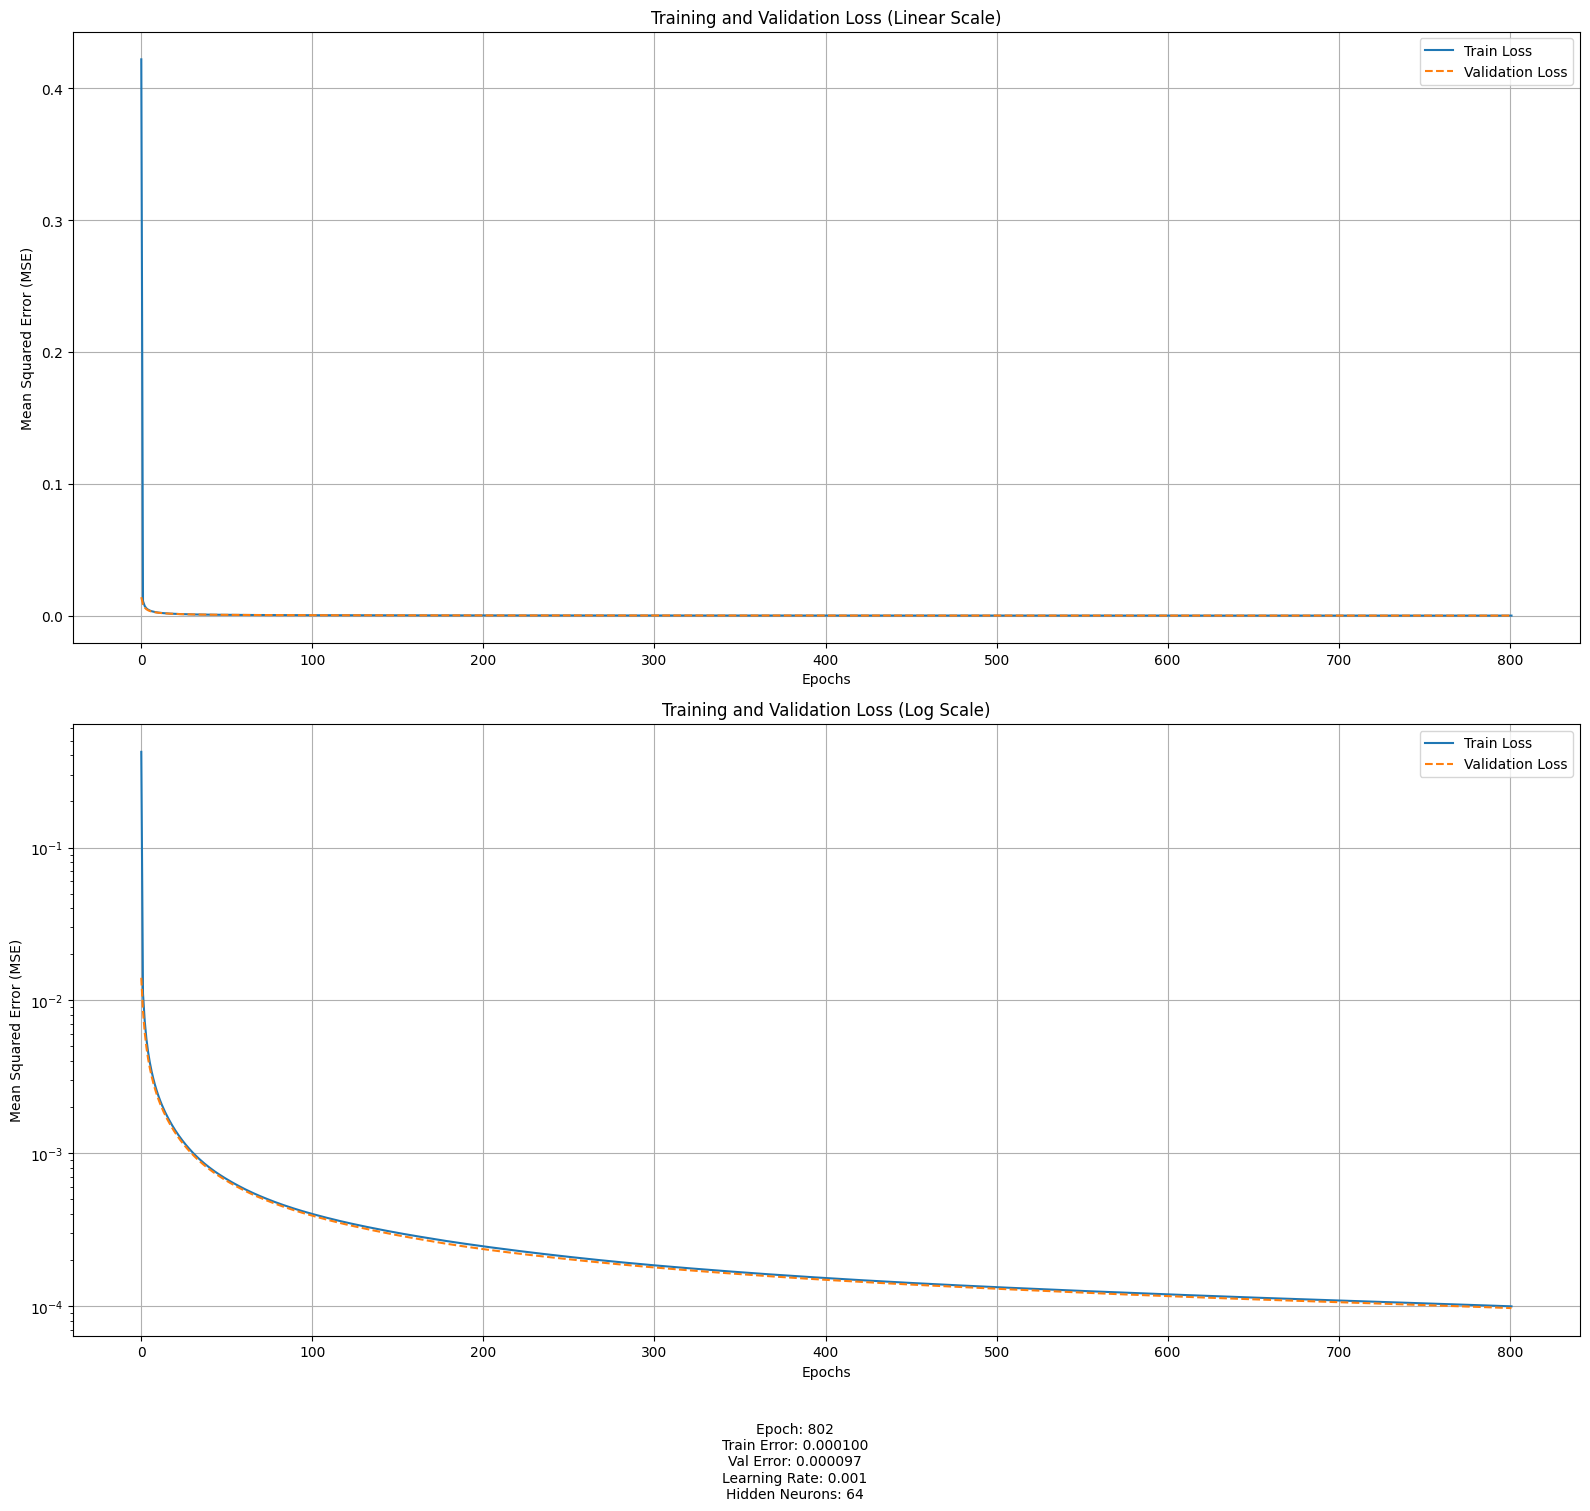

In [ ]:
def plot_error(history, model):
    train_losses = history["train_loss"]
    val_losses = history["val_loss"]
    
    last_epoch = len(train_losses)
    train_error = train_losses[-1]
    val_error = val_losses[-1]
    
    annotation_text = (
        f"Epoch: {last_epoch}\n"
        f"Train Error: {train_error:.6f}\n"
        f"Val Error: {val_error:.6f}\n"
        f"Learning Rate: {model.lr}\n"
        f"Hidden Neurons: {model.NH}"
    )

    fig, axs = plt.subplots(2, 1, figsize=(14, 10))

    # Linear scale plot
    axs[0].plot(train_losses, label='Train Loss', linestyle='-')
    axs[0].plot(val_losses, label='Validation Loss', linestyle='--')
    axs[0].set_title('Training and Validation Loss (Linear Scale)')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Mean Squared Error (MSE)')
    axs[0].legend()
    axs[0].grid(True)

    # Log scale plot
    axs[1].semilogy(train_losses, label='Train Loss', linestyle='-')
    axs[1].semilogy(val_losses, label='Validation Loss', linestyle='--')
    axs[1].set_title('Training and Validation Loss (Log Scale)')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Mean Squared Error (MSE)')
    axs[1].legend()
    axs[1].grid(True)

    # Tambahkan anotasi di bawah figure
    fig.text(0.5, -0.02, annotation_text, ha='center', va='top', fontsize=10)

    plt.tight_layout()
    plt.show()

# Contoh pemanggilan
plot_error(history, model)


### **Testing Data**

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = min_max_denormalize(y_pred_scaled.flatten(), dk['y'].min(), dk['y'].max()) # target prediksi denormalisasi
y_true = min_max_denormalize(Y_test.flatten(), dk['y'].min(), dk['y'].max())  # target asli denormalisasi

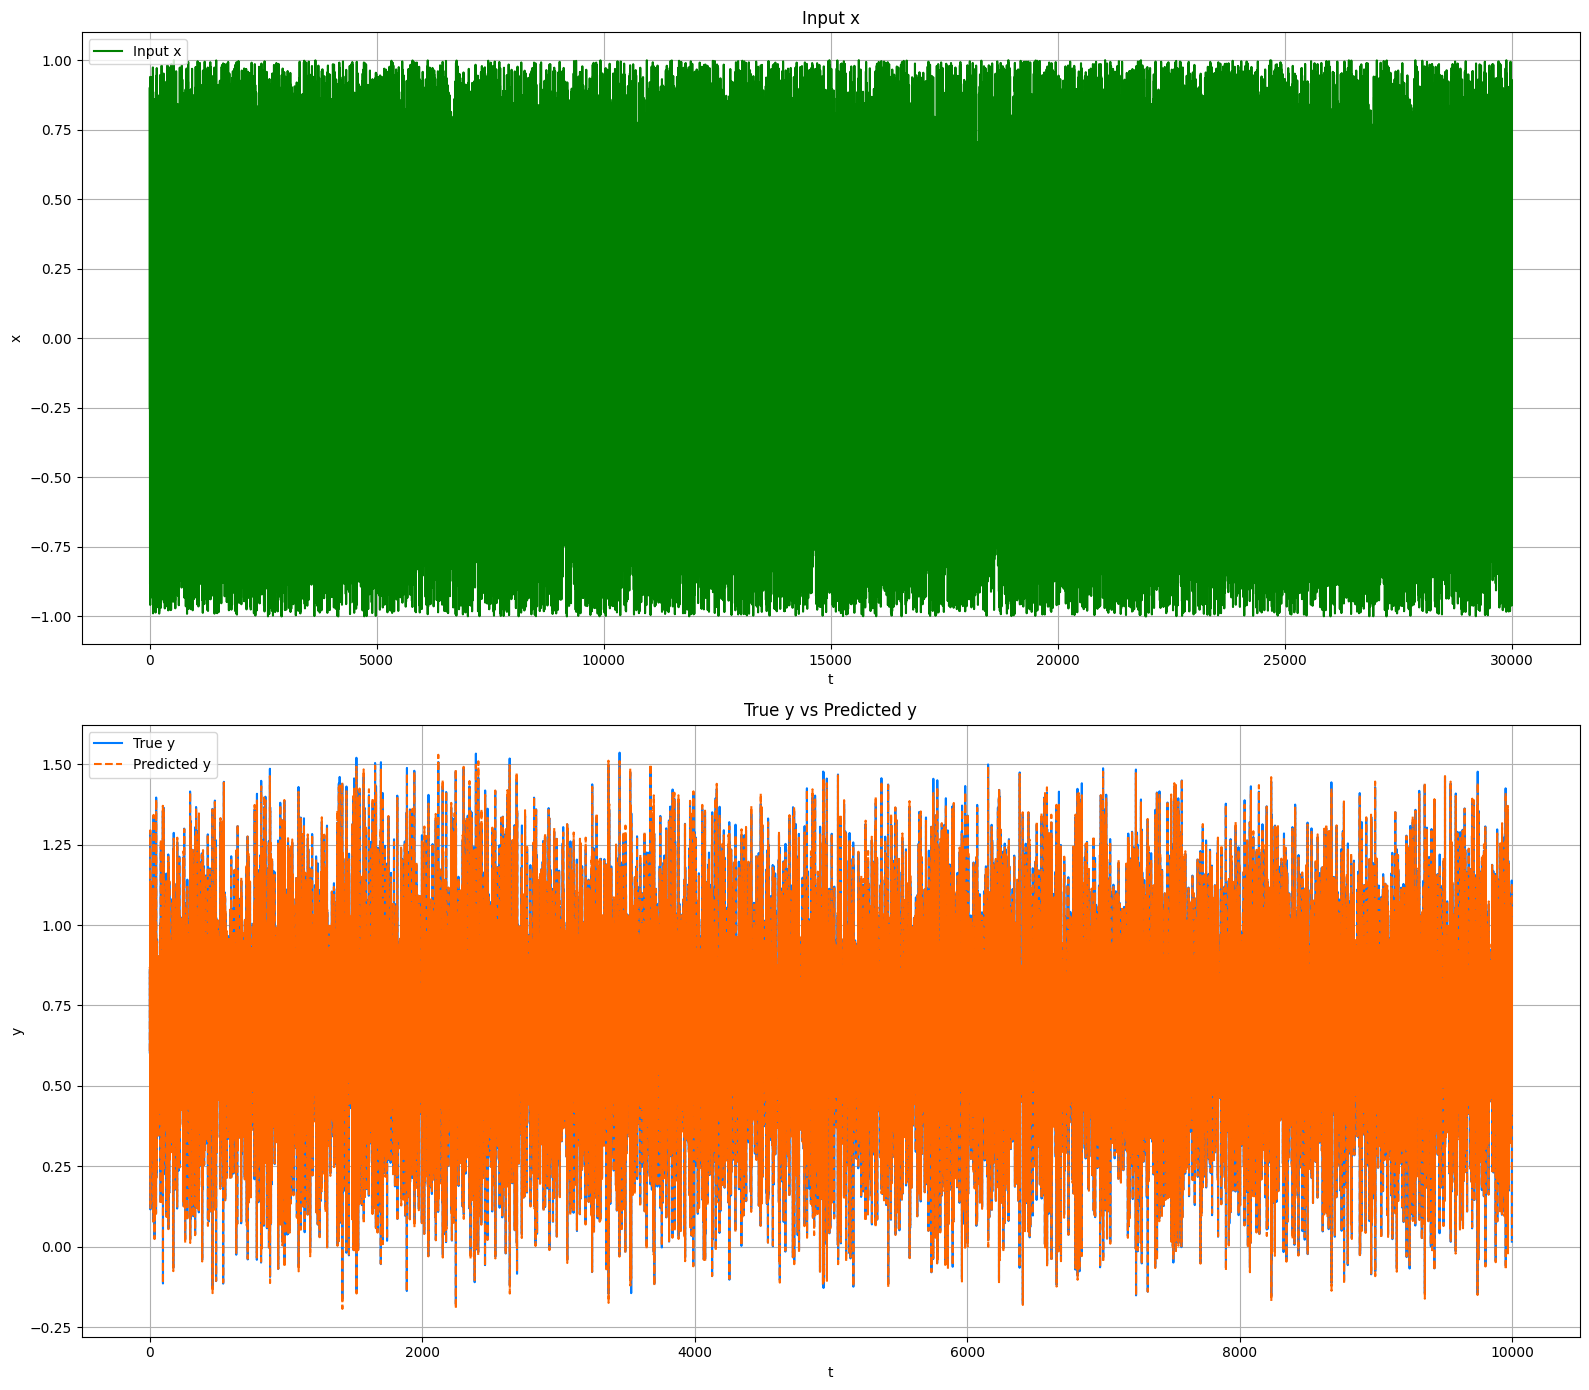

Mean Squared Error (MSE): 7.855274262644871e-05


In [ ]:
def plot_predictions(output_true, output_pred):
    fig, axs = plt.subplots(2, 1, figsize=(14, 10))

    axs[1].plot(output_true, label='True y', color='#007bff')
    axs[1].plot(output_pred, label='Predicted y', color='#ff6600', linestyle='dashed')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('y')
    axs[1].set_title('True y vs Predicted y')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot hasil prediksi vs aktual
plot_predictions(y_true, y_pred)

# Evaluasi model
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

**Test dengan input lain**

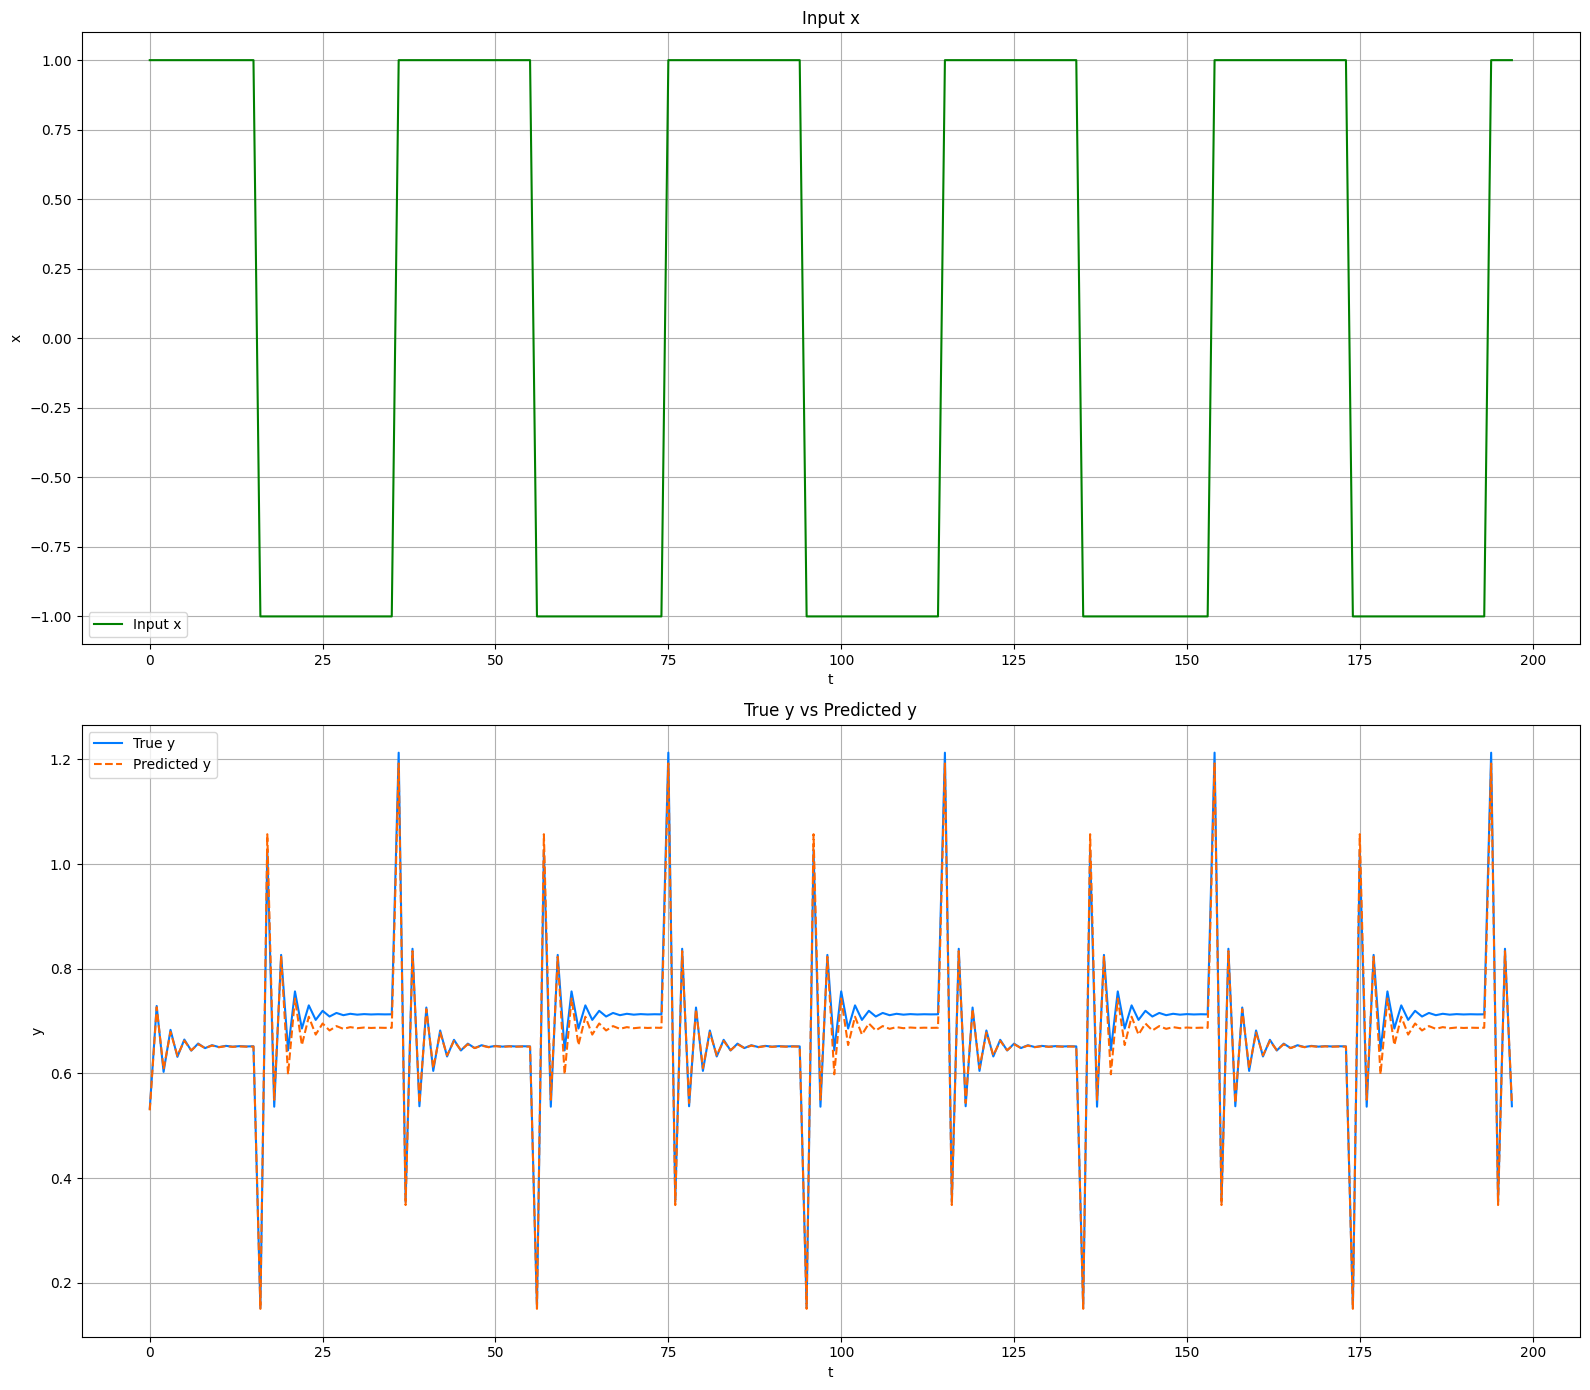

Test 1 : Square Wave
Mean Squared Error: 0.00033251975495482845


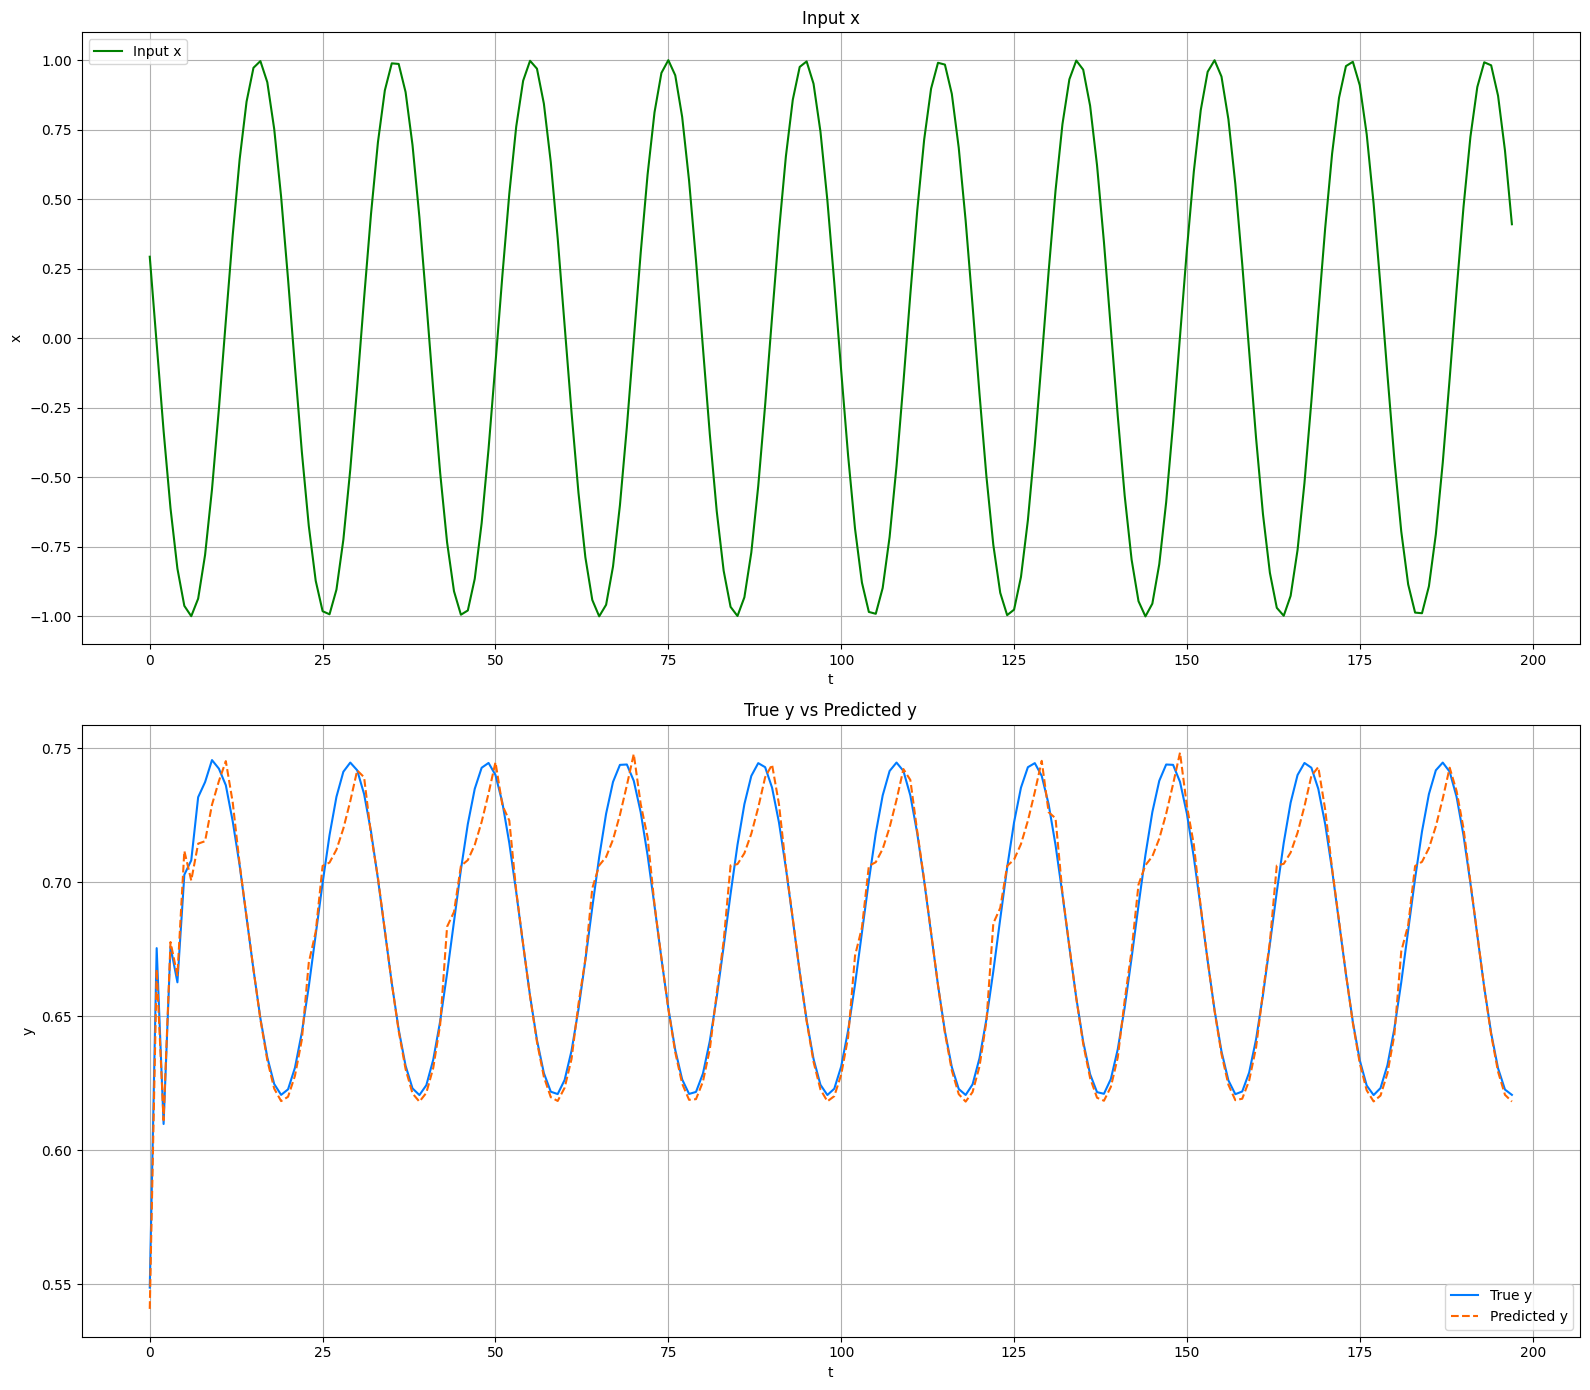

Test 2 : Sinusoidal Wave
Mean Squared Error: 7.27721574236819e-05


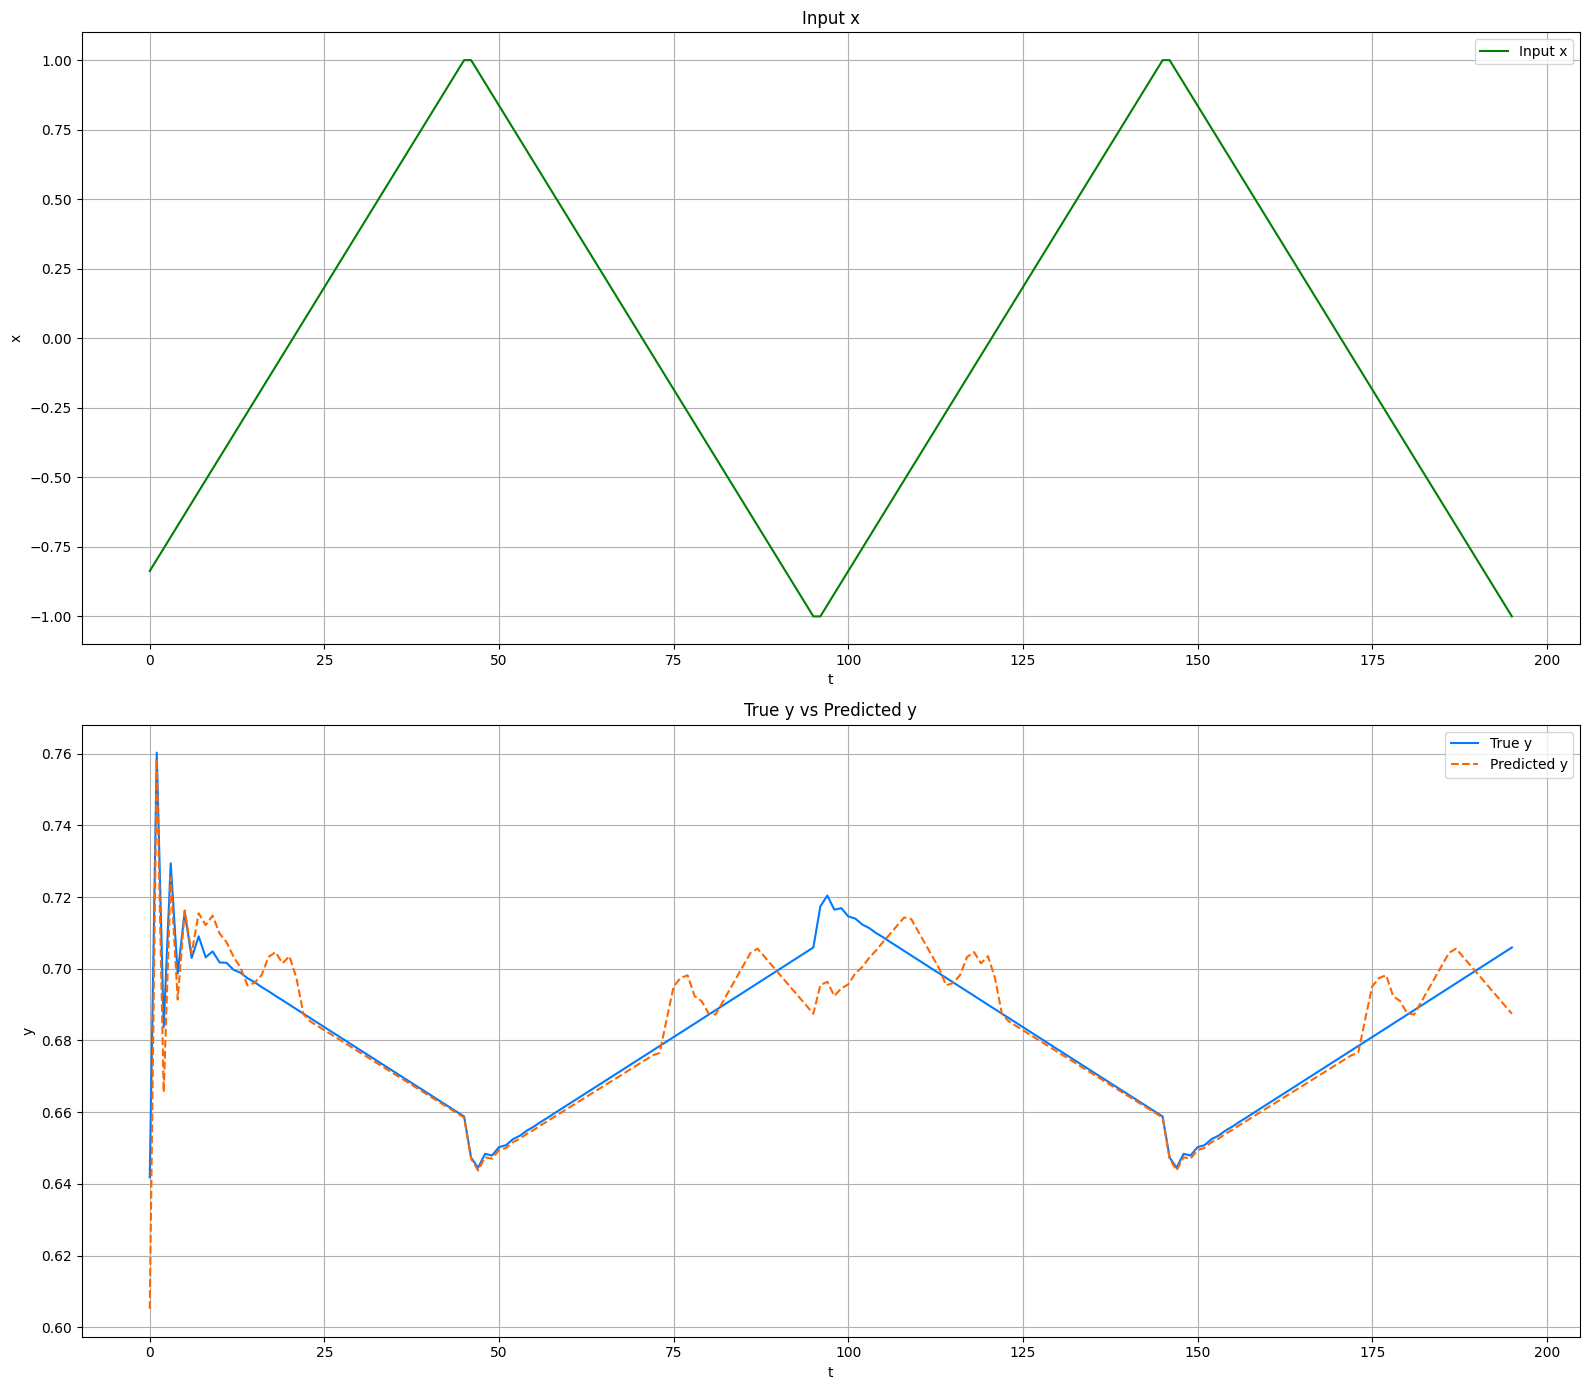

Test 3 : Triangle Wave
Mean Squared Error: 5.3514326647443756e-05


In [ ]:
def plant_response(u):
    """Meniru perilaku plant seperti di fungsi plant_data()"""
    y = np.zeros_like(u)
    y[0] = 0.0
    for k in range(1, len(u)):
        y[k] = 1/(1 + y[k-1]**2) + 0.25*u[k] - 0.3*u[k-1]
    return y

def test_model_custom(model, dk):
    # ambil nilai min & max dari data asli untuk denormalisasi nanti
    x_min, x_max = dk['x'].min(), dk['x'].max()
    y_min, y_max = dk['y'].min(), dk['y'].max()

    # ==============================
    # Test 1: Square Wave
    # ==============================
    u_test1 = np.sign(np.sin(np.arange(0, 202, 1) / (2 * np.pi)))
    y_test1 = plant_response(u_test1)

    # Normalisasi input-output test
    u_test1_n = (2 * (u_test1 - x_min) / (x_max - x_min)) - 1
    y_test1_n = (2 * (y_test1 - y_min) / (y_max - y_min)) - 1

    # Buat dataset lagged
    df_test1 = lagged_dataset(pd.DataFrame({'x': u_test1_n, 'y': y_test1_n}), ['x', 'y'], lag=4)
    X_test1 = df_test1[['x(t)', 'x(t-1)', 'x(t-2)', 'x(t-3)', 'x(t-4)', 
                        'y(t-1)', 'y(t-2)', 'y(t-3)', 'y(t-4)']].values
    Y_true1_n = df_test1[['y(t)']].values

    # Prediksi
    Y_pred1_n = model.predict(X_test1)

    # Denormalisasi hasil
    Y_pred1 = (Y_pred1_n + 1) / 2 * (y_max - y_min) + y_min
    Y_true1 = (Y_true1_n + 1) / 2 * (y_max - y_min) + y_min

    # Plot
    plot_predictions(df_test1['x(t)'], Y_true1, Y_pred1)
    mse1 = np.mean((Y_true1 - Y_pred1)**2)
    print('Test 1 : Square Wave')
    print(f'Mean Squared Error: {mse1}')

    # ==============================
    # Test 2: Sinusoidal Wave
    # ==============================
    u_test2 = np.cos(np.arange(0, 202, 1) / np.pi)
    y_test2 = plant_response(u_test2)

    u_test2_n = (2 * (u_test2 - x_min) / (x_max - x_min)) - 1
    y_test2_n = (2 * (y_test2 - y_min) / (y_max - y_min)) - 1

    df_test2 = lagged_dataset(pd.DataFrame({'x': u_test2_n, 'y': y_test2_n}), ['x', 'y'], lag=4)
    X_test2 = df_test2[['x(t)', 'x(t-1)', 'x(t-2)', 'x(t-3)', 'x(t-4)', 
                        'y(t-1)', 'y(t-2)', 'y(t-3)', 'y(t-4)']].values
    Y_true2_n = df_test2[['y(t)']].values

    Y_pred2_n = model.predict(X_test2)
    Y_pred2 = (Y_pred2_n + 1) / 2 * (y_max - y_min) + y_min
    Y_true2 = (Y_true2_n + 1) / 2 * (y_max - y_min) + y_min

    plot_predictions(df_test2['x(t)'], Y_true2, Y_pred2)
    mse2 = np.mean((Y_true2 - Y_pred2)**2)
    print('Test 2 : Sinusoidal Wave')
    print(f'Mean Squared Error: {mse2}')

    # ==============================
    # Test 3: Triangle Wave
    # ==============================
    u_test3 = np.concatenate([
        np.linspace(-1, 1, 50),
        np.linspace(1, -1, 50),
        np.linspace(-1, 1, 50),
        np.linspace(1, -1, 50)
    ])
    y_test3 = plant_response(u_test3)

    u_test3_n = (2 * (u_test3 - x_min) / (x_max - x_min)) - 1
    y_test3_n = (2 * (y_test3 - y_min) / (y_max - y_min)) - 1

    df_test3 = lagged_dataset(pd.DataFrame({'x': u_test3_n, 'y': y_test3_n}), ['x', 'y'], lag=4)
    X_test3 = df_test3[['x(t)', 'x(t-1)', 'x(t-2)', 'x(t-3)', 'x(t-4)', 
                        'y(t-1)', 'y(t-2)', 'y(t-3)', 'y(t-4)']].values
    Y_true3_n = df_test3[['y(t)']].values

    Y_pred3_n = model.predict(X_test3)
    Y_pred3 = (Y_pred3_n + 1) / 2 * (y_max - y_min) + y_min
    Y_true3 = (Y_true3_n + 1) / 2 * (y_max - y_min) + y_min

    plot_predictions(df_test3['x(t)'], Y_true3, Y_pred3)
    mse3 = np.mean((Y_true3 - Y_pred3)**2)
    print('Test 3 : Triangle Wave')
    print(f'Mean Squared Error: {mse3}')


test_model_custom(model, dk)
